In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#reading dataset using pandas
data_test = pd.read_csv('/content/drive/MyDrive/TestSAR.csv')
data_train = pd.read_csv('/content/drive/MyDrive/TrainSAR.csv')


img_rows, img_cols = 64, 64
input_shape = (img_rows, img_cols)
#taking the pixel values from the training data. The pixel values start from location 1 in the csv file till the 4096
X = np.array(data_train.iloc[:, 1:])
#convert the label type to the string value
y = to_categorical(np.array(data_train.iloc[:, 0]).astype('str'))

#Here we split validation data to optimiza classifier during training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=13)

#Test data
X_test = np.array(data_test.iloc[:, 1:])
#one hot encoding
y_test = to_categorical(np.array(data_test.iloc[:, 0]))


#X_train.shape=(number of images in the index 0, rowsize, columnsize)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [ ]:
print(y_test[100])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(22531, 64, 64)
(9390, 64, 64)
(5633, 64, 64)


In [ ]:
#Training Convolutional Neural Network from scratch (VGG)
#Importing Necessary Libraries for training CNN
import keras
import keras.utils
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l1
from keras import regularizers

#import tensorflow_addons as tfa
from keras.models import load_model
model2=Sequential()

model2.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",kernel_initializer='he_uniform', padding='same',input_shape=(64,64,1)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",kernel_initializer='he_uniform', padding='same',input_shape=(64,64,1)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
#model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
#model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu",kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu",kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=128,kernel_size=(5,5),activation="relu",kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=128,kernel_size=(5,5),kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01),activation="relu",kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
#model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Conv2D(filters=128,kernel_size=(5,5),kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01),activation="relu",kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())


model2.add(Conv2D(filters=128,kernel_size=(5,5),kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01),activation="relu",kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
#model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=256,kernel_size=(5,5),kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01),activation="relu",kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=256,kernel_size=(7,7),kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01),activation="relu",kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=256,kernel_size=(7,7),kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01),activation="relu",kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=256,kernel_size=(7,7),kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01),activation="relu",kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=256,kernel_size=(7,7),kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01),activation="relu",kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
#model2.add(MaxPooling2D(pool_size=(2,2)))


"""cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01)))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.25))

cnn4.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01)))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.25))

cnn4.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01)))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.25))

cnn4.add(Dense(10, activation='softmax'))"""




model2.add(Flatten())
#model2.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01)))
#model2.add(BatchNormalization())
#cnn4.add(Dropout(0.25))
model2.add(Dense(10,activation="softmax",kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01)))

#Model Summary
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_38 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_39 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                      

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.9, beta_2=0.9, epsilon=1e-07)
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

"""from tensorflow.keras.optimizers import RMSprop
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-07)
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])"""

"from tensorflow.keras.optimizers import RMSprop\noptimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-07)\nmodel2.compile(loss='categorical_crossentropy',\n              optimizer=optimizer,\n              metrics=['accuracy'])"

In [ ]:
#batch size 32 is the good one for standard image classification
#if the image noisy level is more, then increase the batch size
history3 = model2.fit(X_train, y_train,
              batch_size=32,
              epochs=100,
              verbose=1,
              validation_data=(X_val, y_val))

Epoch 1/100
705/705 [==============================] - 29s 37ms/step - loss: 6.8296 - accuracy: 0.3894 - val_loss: 2.8585 - val_accuracy: 0.5054
Epoch 2/100
705/705 [==============================] - 26s 36ms/step - loss: 2.7871 - accuracy: 0.5371 - val_loss: 2.4934 - val_accuracy: 0.6199
Epoch 3/100
705/705 [==============================] - 26s 36ms/step - loss: 2.4832 - accuracy: 0.5987 - val_loss: 2.1589 - val_accuracy: 0.6718
Epoch 4/100
705/705 [==============================] - 26s 36ms/step - loss: 2.2429 - accuracy: 0.6515 - val_loss: 2.0314 - val_accuracy: 0.6998
Epoch 5/100
705/705 [==============================] - 26s 37ms/step - loss: 2.0250 - accuracy: 0.6948 - val_loss: 1.8133 - val_accuracy: 0.7440
Epoch 6/100
705/705 [==============================] - 26s 36ms/step - loss: 1.8278 - accuracy: 0.7294 - val_loss: 1.5524 - val_accuracy: 0.7985
Epoch 7/100
705/705 [==============================] - 26s 37ms/step - loss: 1.6434 - accuracy: 0.7594 - val_loss: 1.4982 - val_ac

KeyboardInterrupt: ignored

In [ ]:
loss, accuracy=model2.evaluate(X_test, y_test, verbose=0)
print(accuracy*100)
print(loss)

95.50585746765137
0.34898731112480164


In [ ]:
def save_history(history, fn):
    with open(fn, 'wb') as fw:
        pickle.dump(history.history, fw, protocol=2)

def load_history(fn):
    class Temp():
        pass
    history = Temp()
    with open(fn, 'rb') as fr:
        history.history = pickle.load(fr)
    return history

def jitter(img, amount=32):
    ox, oy = np.random.randint(-amount, amount+1, 2)
    return np.roll(np.roll(img, ox, -1), oy, -2), ox, oy

def reverse_jitter(img, ox, oy):
    return np.roll(np.roll(img, -ox, -1), -oy, -2)

def plot_image(img):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

In [ ]:
def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['accuracy'])
    acc = smooth_curve(history.history['accuracy'][:steps])
    val_acc = smooth_curve(history.history['val_accuracy'][:steps])
    loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])

    plt.figure(figsize=(6, 4))
    plt.plot(loss, c='#0c7cba', label='Train Loss')
    plt.plot(val_loss, c='#0f9d58', label='Val Loss')
    plt.xticks(range(0, len(loss), 5))
    plt.xlim(0, len(loss))
    plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    plt.ylabel('Identification accuracy (%)')
    plt.xlabel('Rank',)

    plt.figure(figsize=(6, 4))
    plt.plot(acc, c='#0c7cba', label='Train Acc')
    plt.plot(val_acc, c='#0f9d58', label='Val Acc')
    plt.xticks(range(0, len(acc), 10))
    plt.xlim(0, len(acc))
    plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()
    plt.ylabel('Identification accuracy (%)')
    plt.xlabel('Rank')

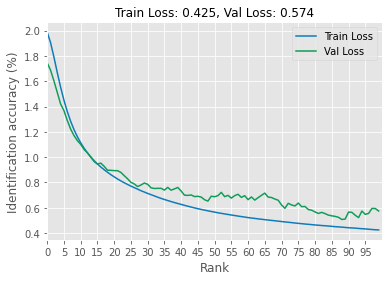

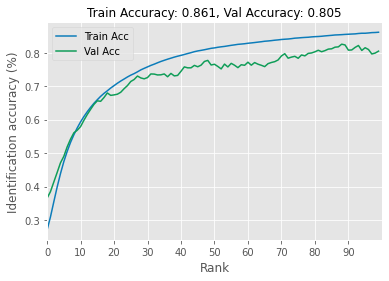

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import pickle
model2.save('Model_Texture.h5')
save_history(history3, 'hist1.bin')
history=load_history('hist1.bin')
plot_compare(history)

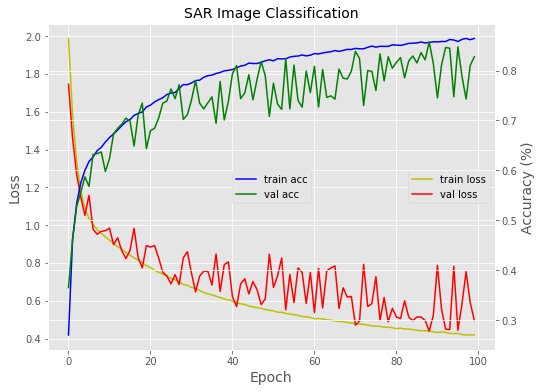

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(8,6))
acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('Epoch',fontname='Times New Roman Bold', fontsize=14)
loss_ax.set_ylabel('Loss',fontname='Times New Roman Bold', fontsize=14)
loss_ax.legend(loc='right')

acc_ax.plot(history3.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history3.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('Accuracy (%)',fontname='Times New Roman Bold', fontsize=14)
acc_ax.set_title('SAR Image Classification',fontname='Times New Roman Bold', fontsize=14)
acc_ax.legend(loc='center')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_hat = model2.predict(X_test)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(y_hat)
print(cm)


294/294 [==============================] - 1s 4ms/step
[[5.1655824e-29 1.0000000e+00 1.4609468e-24 ... 0.0000000e+00
  6.9954513e-28 2.2612424e-22]
 [1.6160862e-23 1.4714794e-24 5.2198056e-27 ... 1.9058888e-13
  3.6367935e-01 7.4556833e-11]
 [3.2897815e-33 1.0000000e+00 7.2407207e-23 ... 0.0000000e+00
  1.6168605e-18 1.2443454e-21]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.1134406e-31
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 1.4335611e-21 6.8623538e-33 ... 6.1508258e-36
  6.3095342e-19 1.6268958e-18]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
[[1238    0    0    0    0    0    0    0    0    1]
 [   0 1182   12    0    2    0    0    0    1    0]
 [   0   13 1101    0   44    1    0    0    0    1]
 [   0    0    0 1083    1   24    3   12   12    0]
 [   0    1   42    4 1119   16    0    6    4    1]
 [   0    0    9   19   48 1009    7    8    0    0]
 [   5    0    1   10    4    8  458    0    4    9]
 [   0    

In [ ]:
#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import jaccard_score
sim1 = jaccard_score(y_true, y_pred, average=None)
sim1

array([0.9904    , 0.97283951, 0.89731051, 0.91161616, 0.8568147 ,
       0.86758383, 0.89278752, 0.84736842, 0.91066545, 0.7652439 ])

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

confusion_matrix(y_true, y_pred)

array([[1238,    0,    0,    0,    0,    0,    0,    0,    0,    1],
       [   0, 1182,   12,    0,    2,    0,    0,    0,    1,    0],
       [   0,   13, 1101,    0,   44,    1,    0,    0,    0,    1],
       [   0,    0,    0, 1083,    1,   24,    3,   12,   12,    0],
       [   0,    1,   42,    4, 1119,   16,    0,    6,    4,    1],
       [   0,    0,    9,   19,   48, 1009,    7,    8,    0,    0],
       [   5,    0,    1,   10,    4,    8,  458,    0,    4,    9],
       [   0,    0,    0,   12,    8,   14,    0,  483,   14,    0],
       [   0,    0,    0,    6,    1,    0,    1,   13,  999,   17],
       [   6,    4,    3,    2,    5,    0,    3,    0,   25,  251]])

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.grid(False)
    plt.show()


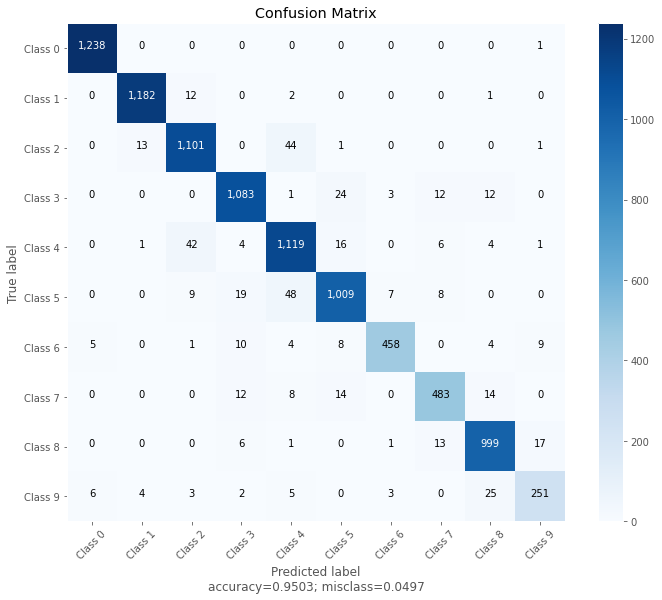

In [ ]:
plot_confusion_matrix(cm,
                      normalize    = False,
                      target_names= ['Class 0','Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5','Class 6','Class 7','Class 8','Class 9'],
                      title        = "Confusion Matrix")

Text(0.5, 33.0, 'Predicted label')

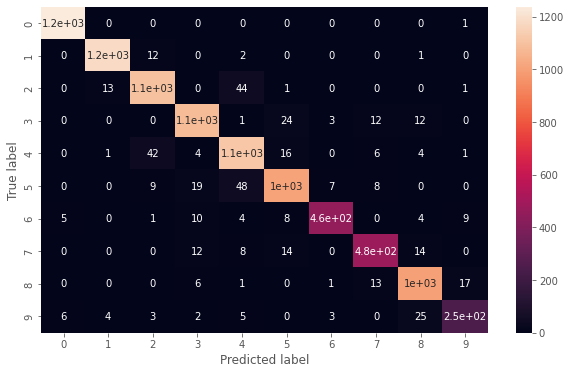

In [ ]:
import seaborn as sns
df_cm=pd.DataFrame(cm)
plt.figure(figsize=(10,6))
sns.heatmap(df_cm,annot=True)
#plt.title("CNN Accuracy:{:6.5f}".format(hist1.history["val_acc"][-1]))
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(model2.predict(X_test), axis=1)
y_true1 = np.argmax(y_test, axis=1)
y_true=y_true1.astype(np.int64)

294/294 [==============================] - 1s 4ms/step


In [ ]:
target_names= ['Class 0','Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5','Class 6','Class 7','Class 8','Class 9']
print(classification_report(y_true, y_pred,target_names=target_names))
print(confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00      1239
     Class 1       0.98      0.99      0.99      1197
     Class 2       0.94      0.95      0.95      1160
     Class 3       0.95      0.95      0.95      1135
     Class 4       0.91      0.94      0.92      1193
     Class 5       0.94      0.92      0.93      1100
     Class 6       0.97      0.92      0.94       499
     Class 7       0.93      0.91      0.92       531
     Class 8       0.94      0.96      0.95      1037
     Class 9       0.90      0.84      0.87       299

    accuracy                           0.95      9390
   macro avg       0.95      0.94      0.94      9390
weighted avg       0.95      0.95      0.95      9390

[[1238    0    0    0    0    0    0    0    0    1]
 [   0 1182   12    0    2    0    0    0    1    0]
 [   0   13 1101    0   44    1    0    0    0    1]
 [   0    0    0 1083    1   24    3   12   12    0]
 [   0    1   42    4 1119   

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision (micro): %f" % precision_score(y_pred, y_true, average='micro'))
print("Recall (micro):    %f" % recall_score(y_pred, y_true, average='micro'))
print("F1 score (micro):  %f" % f1_score(y_pred, y_true, average='micro'), end='\n\n')

print("Precision (macro): %f" % precision_score(y_pred, y_true, average='macro'))
print("Recall (macro):    %f" % recall_score(y_pred, y_true, average='macro'))
print("F1 score (macro):  %f" % f1_score(y_pred, y_true, average='macro'), end='\n\n')

print("Precision (weighted): %f" % precision_score(y_pred, y_true, average='weighted'))
print("Recall (weighted):    %f" % recall_score(y_pred, y_true, average='weighted'))
print("F1 score (weighted):  %f" % f1_score(y_pred, y_true, average='weighted'),end='\n\n')

from sklearn.metrics import cohen_kappa_score
print("kappa_score(micro): %f" % cohen_kappa_score(y_pred, y_true))
print("kappa_score(macro):    %f" % cohen_kappa_score(y_pred, y_true))
print("kappa_score(weighted):  %f" % cohen_kappa_score(y_pred, y_true))

Precision (micro): 0.950266
Recall (micro):    0.950266
F1 score (micro):  0.950266

Precision (macro): 0.937549
Recall (macro):    0.945708
F1 score (macro):  0.941403

Precision (weighted): 0.950764
Recall (weighted):    0.950266
F1 score (weighted):  0.950382

kappa_score(micro): 0.943924
kappa_score(macro):    0.943924
kappa_score(weighted):  0.943924


In [ ]:
score1 = model2.evaluate(X_test, y_test,verbose=1)

print(score1)

y_testpred = model2.predict(X_test)

pred_labels = []
for i in range(10):
    r = np.round(np.array(np.exp(y_hat[i])/sum(np.exp(y_hat[i]))),1).argmax()
    print(r)
    if r ==0 : pred_labels.append("0")
    elif r ==1: pred_labels.append("1")
    elif r ==2: pred_labels.append("2")
    elif r ==3: pred_labels.append("3")
    elif r ==4: pred_labels.append("4")
    elif r ==5: pred_labels.append("5")
    elif r ==6: pred_labels.append("6")
    elif r ==7: pred_labels.append("7")
    elif r ==8: pred_labels.append("8")
    elif r ==9: pred_labels.append("9")
images = X_test[:10]
print(images.shape)
print(type(images))

294/294 [==============================] - 2s 5ms/step - loss: 0.5481 - accuracy: 0.9503
[0.5480542182922363, 0.9502662420272827]
294/294 [==============================] - 1s 4ms/step
1
3
1
8
2
6
5
8
8
0
(10, 64, 64)
<class 'numpy.ndarray'>


(10, 64, 64)


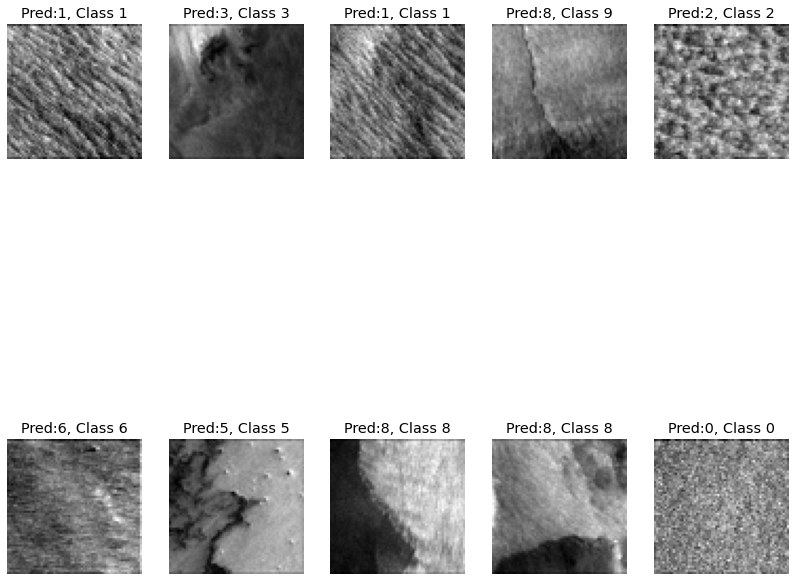

In [ ]:
#Multiple images parameters
import matplotlib.pyplot as plt
w=64
h=64
columns = 5
rows = 2
images = X_test[:10]
print(images.shape)
fig = plt.figure(figsize=(14, 14))
for m in range(1, columns*rows +1):
    img = images[m-1].reshape([64, 64])
    fig.add_subplot(rows, columns, m)
    plt.imshow(img,cmap='gray')
    plt.title("Pred:{}, Class {}".format(pred_labels[m-1], y_true[m-1]))
    #plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.axis('off')
    plt.grid(False)
plt.show()

294/294 [==============================] - 1s 4ms/step
(9390,) (9390, 10)
Found 1 incorrect labels


<ipython-input-34-414d3ff94d5b>:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  incorrect = np.where(predicted_classes!=y_test)[0]


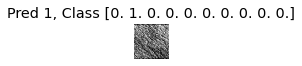

In [ ]:
predicted_classes = model2.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
print(predicted_classes.shape,y_test.shape)
incorrect = np.where(predicted_classes!=y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(64,64), interpolation='none', cmap='gray')
    plt.title("Pred {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.grid(False)
    plt.axis('off')
    plt.tight_layout()

<ipython-input-35-a9ad625c54a5>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  correct = np.where(predicted_classes==y_test)[0]


Found 0 correct labels
[1 3 1 8 2 6 5 8 8 0 2 1 2 6 3 0 3 2 6 2 5 8 5 0 1 6 3 8 4 0 8 2 3 4 0 5 0
 5 4 1 0 5 2 1 8 1 8 1 1 9 1 1 8 8 5 3 1 3 3 7 8 0 0 0 3 0 0 7 3 0 2 0 1 4
 3 0 5 7 3 4 0 8 2 5 8 3 8 4 4 6 5 9 8 5 3 4 2 3 7 4]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 

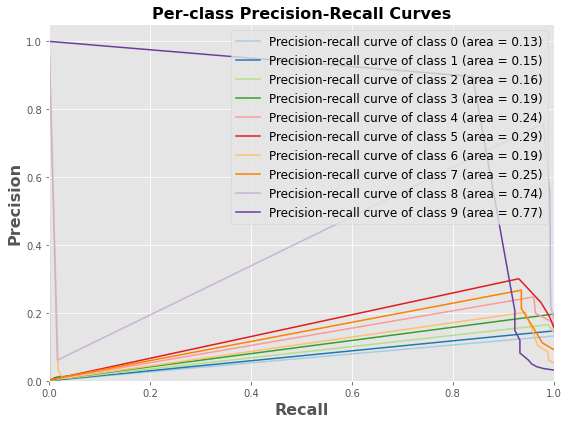

In [ ]:
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(64,64), interpolation='none', cmap='gray')
    plt.title("Pred {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.grid(False)
    plt.axis('off')
    plt.tight_layout()
print(predicted_classes[0:100])
print(y_test[0:100])
from sklearn.metrics import precision_recall_curve, average_precision_score
precision = dict()
recall = dict()
average_precision = dict()
for i in range(10):
    t = y_test[:, i]
    s = y_pred
    precision[i], recall[i], _ = precision_recall_curve(t, s)
    average_precision[i] = average_precision_score(t, s)
# Plot Precision-Recall curve for each class
colors = ('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928')
fig, ax = plt.subplots(figsize=(8,6))
#ax.set_axis_bgcolor('white')
for cl, co in zip(range(10), colors):
    plt.plot(recall[cl], precision[cl], color=co,
             label='Precision-recall curve of class {} (area = {:.2f})'.format(cl, average_precision[cl]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', size=16, weight='bold')
plt.ylabel('Precision', size=16, weight='bold')
plt.title('Per-class Precision-Recall Curves', size=16, weight='bold')
plt.legend(loc="upper right", prop={'size':12})
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_value, mae_value = model2.evaluate(X_test, y_testpred, verbose=0)
print("Mean Squared Error (MSE)=",mse_value)
print("Mean Absolute Error (MAE)=",mae_value)
print("Mean Squared Error (MSE)=",mean_squared_error(y_testpred, y_test))
print("Mean Absolute Error (MAE)=",mean_absolute_error(y_testpred, y_test))
print ("R^2 is: \n", r2_score(y_test, y_testpred))
print ('RMSE is: \n', np.sqrt(mean_squared_error(y_test, y_testpred)))

Mean Squared Error (MSE)= 0.015982626006007195
Mean Absolute Error (MAE)= 1.0
Mean Squared Error (MSE)= 0.009093238
Mean Absolute Error (MAE)= 0.010044014
R^2 is: 
 0.8836202010940166
RMSE is: 
 0.09535847


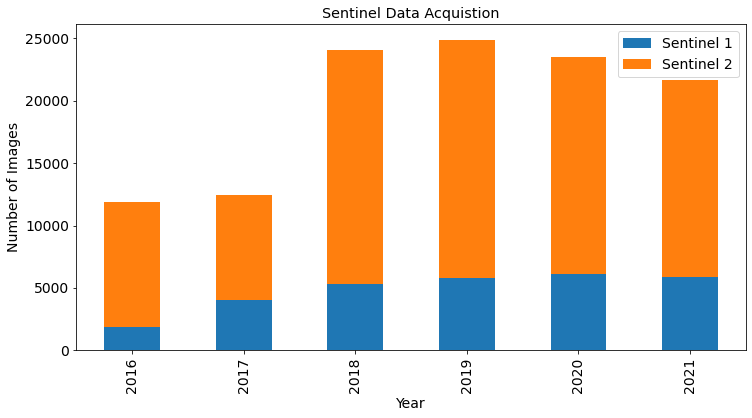

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plotdata = pd.DataFrame({
    "Sentinel 1":[1834,4062,5340,5804, 6092, 5855],
    "Sentinel 2":[10061,8428,18719,19100, 17445, 15783],
    },
    index=["2016", "2017", "2018", "2019", "2020", "2021"])
plotdata.plot(kind='bar', stacked=True,figsize=(12, 6))
plt.rcParams['font.size']='12'
#plt.xticks(xticks_pos, labels,  ha='right', rotation=55, fontsize=20,)
plt.xlabel('Year')
plt.ylabel('Number of Images')
plt.title("Sentinel Data Acquistion")
plt.show()

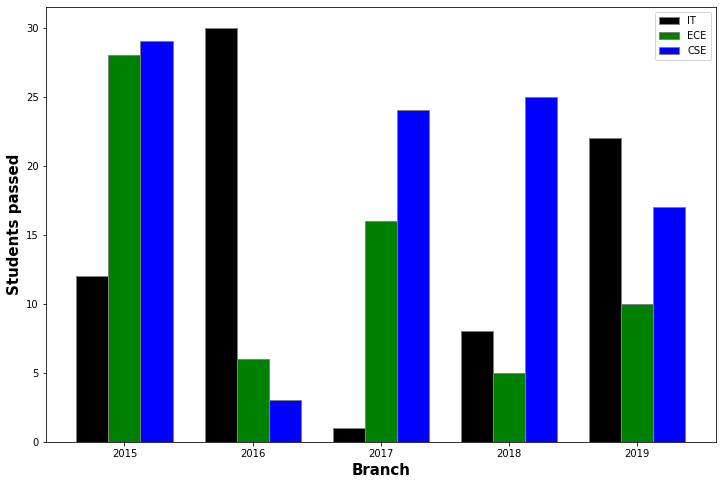

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
IT = [12, 30, 1, 8, 22]
ECE = [28, 6, 16, 5, 10]
CSE = [29, 3, 24, 25, 17]

# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, IT, color ='#000000', width = barWidth,
        edgecolor ='grey', label ='IT')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='ECE')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='CSE')

# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['2015', '2016', '2017', '2018', '2019'])

plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile("drive/My Drive/resize128.zip","r") as zip_ref:
  zip_ref.extractall()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
from keras import utils as np_utils
%matplotlib inline
train = pd.read_csv('drive/My Drive/Traindata.csv')
TRAIN_PATH = 'resize128/'
from PIL import Image
from imageio import imread
from skimage.transform import resize
import cv2
from tqdm import tqdm

# defining a function to read images
def read_img(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=[128, 128,1],grayscale=True)
    img = tf.keras.utils.img_to_array(img)
    img = img/255
    return img

# reading the images
train_img = []
for img_path in tqdm(train.Image.values):
    train_img.append(read_img(TRAIN_PATH + img_path))



  0%|          | 0/28164 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
100%|██████████| 28164/28164 [00:15<00:00, 1863.00it/s]


In [ ]:
X_train = np.array(train_img)
print("Length of total input:",len(X_train))
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(train.Label.values)
Y_train = lb.transform(train.Label.values)
Y_train=Y_train.astype(np.int32)
Y_train = np_utils.to_categorical(Y_train)
split_size = int(X_train.shape[0]*0.8)
x_train, x_test = X_train[:split_size], X_train[split_size:]
y_train, y_test = Y_train[:split_size], Y_train[split_size:]
print(x_train.shape, x_test.shape,)
print(y_train.shape, y_test.shape)
print(len(y_test))

Length of total input: 28164
(22531, 128, 128, 1) (5633, 128, 128, 1)
(22531, 10) (5633, 10)
5633


In [ ]:
image_shape = x_train.shape[1:]
n_classes = y_train.shape[1]
print("Number of training examples =", x_train.shape[0])
print("Number of testing examples =", x_test.shape[0])
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 22531
Number of testing examples = 5633
Image data shape = (128, 128, 1)
Number of classes = 10


In [ ]:
# Each image's dimension is 100 x 100
img_rows, img_cols = 128, 128
input_shape = (img_rows, img_cols, 1)

In [ ]:
#https://keras.io/api/optimizers/
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras import regularizers


cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())
#cnn4.add(MaxPooling2D(pool_size=(2, 2)))


cnn4.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(MaxPooling2D(pool_size=(2, 2)))

cnn4.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(MaxPooling2D(pool_size=(2, 2)))


cnn4.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(MaxPooling2D(pool_size=(2, 2)))


cnn4.add(Conv2D(128, kernel_size=(5, 5), padding='same', activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(7, 7), padding='same', activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(7, 7), padding='same', activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(256, kernel_size=(7, 7), padding='same', activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(256, kernel_size=(9, 9), padding='same', activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(512, kernel_size=(9, 9), padding='same', activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.25))


cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01)))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.25))

cnn4.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01)))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.25))

cnn4.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01)))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.25))

cnn4.add(Dense(10, activation='softmax'))

In [ ]:
from keras.optimizers import Adam
cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,),
              metrics=['accuracy'])


'''
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD", **kwargs
)


tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
    **kwargs
)

tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    **kwargs
)

tf.keras.optimizers.Adadelta(
    learning_rate=0.001, rho=0.95, epsilon=1e-07, name="Adadelta", **kwargs
)

tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad",
    **kwargs
)

tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax", **kwargs
)

tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam", **kwargs
)

tf.keras.optimizers.Ftrl(
    learning_rate=0.001,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.0,
    l2_regularization_strength=0.0,
    name="Ftrl",
    l2_shrinkage_regularization_strength=0.0,
    beta=0.0,
    **kwargs
)'''

'\ntf.keras.optimizers.SGD(\n    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD", **kwargs\n)\n\n\ntf.keras.optimizers.RMSprop(\n    learning_rate=0.001,\n    rho=0.9,\n    momentum=0.0,\n    epsilon=1e-07,\n    centered=False,\n    name="RMSprop",\n    **kwargs\n)\n\ntf.keras.optimizers.Adam(\n    learning_rate=0.001,\n    beta_1=0.9,\n    beta_2=0.999,\n    epsilon=1e-07,\n    amsgrad=False,\n    name="Adam",\n    **kwargs\n)\n\ntf.keras.optimizers.Adadelta(\n    learning_rate=0.001, rho=0.95, epsilon=1e-07, name="Adadelta", **kwargs\n)\n\ntf.keras.optimizers.Adagrad(\n    learning_rate=0.001,\n    initial_accumulator_value=0.1,\n    epsilon=1e-07,\n    name="Adagrad",\n    **kwargs\n)\n\ntf.keras.optimizers.Adamax(\n    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax", **kwargs\n)\n\ntf.keras.optimizers.Nadam(\n    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam", **kwargs\n)\n\ntf.keras.optimizers.Ftrl(\n    learning

In [ ]:
cnn4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 118, 118, 64)      102464    
                                                                 
 batch_normalization_2 (Batc  (None, 118, 118, 64)     2

In [ ]:
history3 = cnn4.fit(x_train, y_train,
          batch_size=64, epochs=100, verbose=1, validation_data=(x_test, y_test))

In [ ]:
loss, accuracy=cnn4.evaluate(x_test, y_test, verbose=0)
print(accuracy*100)
print(loss)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import pickle
cnn4.save('Model_Texture.h5')
save_history(history3, 'hist1.bin')
history=load_history('hist1.bin')
plot_compare(history)

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(8,6))
acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('Epoch',fontname='Times New Roman Bold', fontsize=14)
loss_ax.set_ylabel('Loss',fontname='Times New Roman Bold', fontsize=14)
loss_ax.legend(loc='right')

acc_ax.plot(history3.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history3.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('Accuracy (%)',fontname='Times New Roman Bold', fontsize=14)
acc_ax.set_title('SAR Image Classification',fontname='Times New Roman Bold', fontsize=14)
acc_ax.legend(loc='center')

plt.show()

In [ ]:
def save_history(history, fn):
    with open(fn, 'wb') as fw:
        pickle.dump(history.history, fw, protocol=2)

def load_history(fn):
    class Temp():
        pass
    history = Temp()
    with open(fn, 'rb') as fr:
        history.history = pickle.load(fr)
    return history

def jitter(img, amount=32):
    ox, oy = np.random.randint(-amount, amount+1, 2)
    return np.roll(np.roll(img, ox, -1), oy, -2), ox, oy

def reverse_jitter(img, ox, oy):
    return np.roll(np.roll(img, -ox, -1), -oy, -2)

def plot_image(img):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')

In [ ]:
def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['accuracy'])
    acc = smooth_curve(history.history['accuracy'][:steps])
    val_acc = smooth_curve(history.history['val_accuracy'][:steps])
    loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])

    plt.figure(figsize=(6, 4))
    plt.plot(loss, c='#0c7cba', label='Train Loss')
    plt.plot(val_loss, c='#0f9d58', label='Val Loss')
    plt.xticks(range(0, len(loss), 5))
    plt.xlim(0, len(loss))
    plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    plt.ylabel('Identification accuracy (%)')
    plt.xlabel('Rank',)

    plt.figure(figsize=(6, 4))
    plt.plot(acc, c='#0c7cba', label='Train Acc')
    plt.plot(val_acc, c='#0f9d58', label='Val Acc')
    plt.xticks(range(0, len(acc), 10))
    plt.xlim(0, len(acc))
    plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()
    plt.ylabel('Identification accuracy (%)')
    plt.xlabel('Rank')

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

In [ ]:
from sklearn.metrics import confusion_matrix
y_hat = cnn4.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(y_hat)
print(cm)

In [ ]:
from sklearn.metrics import jaccard_similarity_score
sim1 = jaccard_similarity_score(y_true, y_pred)
sim1

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.grid(False)
    plt.show()


In [ ]:
plot_confusion_matrix(cm,
                      normalize    = False,
                      target_names= ['Class 0','Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5','Class 6','Class 7','Class 8','Class 9'],
                      title        = "Confusion Matrix")

In [ ]:
import seaborn as sns
df_cm=pd.DataFrame(cm)
plt.figure(figsize=(10,6))
sns.heatmap(df_cm,annot=True)
#plt.title("CNN Accuracy:{:6.5f}".format(hist1.history["val_acc"][-1]))
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(cnn4.predict(x_test), axis=1)
y_true1 = np.argmax(y_test, axis=1)
y_true=y_true1.astype(np.int64)

In [ ]:
target_names= ['Class 0','Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5','Class 6','Class 7','Class 8','Class 9']
print(classification_report(y_true, y_pred,target_names=target_names))
print(confusion_matrix(y_true, y_pred))

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision (micro): %f" % precision_score(y_pred, y_true, average='micro'))
print("Recall (micro):    %f" % recall_score(y_pred, y_true, average='micro'))
print("F1 score (micro):  %f" % f1_score(y_pred, y_true, average='micro'), end='\n\n')

print("Precision (macro): %f" % precision_score(y_pred, y_true, average='macro'))
print("Recall (macro):    %f" % recall_score(y_pred, y_true, average='macro'))
print("F1 score (macro):  %f" % f1_score(y_pred, y_true, average='macro'), end='\n\n')

print("Precision (weighted): %f" % precision_score(y_pred, y_true, average='weighted'))
print("Recall (weighted):    %f" % recall_score(y_pred, y_true, average='weighted'))
print("F1 score (weighted):  %f" % f1_score(y_pred, y_true, average='weighted'),end='\n\n')

from sklearn.metrics import cohen_kappa_score
print("kappa_score(micro): %f" % cohen_kappa_score(y_pred, y_true))
print("kappa_score(macro):    %f" % cohen_kappa_score(y_pred, y_true))
print("kappa_score(weighted):  %f" % cohen_kappa_score(y_pred, y_true))

In [ ]:
score1 = cnn4.evaluate(x_test, y_test,verbose=1)

print(score1)

In [ ]:
y_testpred = cnn4.predict(x_test)

In [ ]:
pred_labels = []
for i in range(10):
    r = np.round(np.array(np.exp(y_hat[i])/sum(np.exp(y_hat[i]))),1).argmax()
    print(r)
    if r ==0 : pred_labels.append("0")
    elif r ==1: pred_labels.append("1")
    elif r ==2: pred_labels.append("2")
    elif r ==3: pred_labels.append("3")
    elif r ==4: pred_labels.append("4")
    elif r ==5: pred_labels.append("5")
    elif r ==6: pred_labels.append("6")
    elif r ==7: pred_labels.append("7")
    elif r ==8: pred_labels.append("8")
    elif r ==9: pred_labels.append("9")


In [ ]:
images = x_test[:10]
print(images.shape)
print(type(images))

In [ ]:
#Multiple images parameters
import matplotlib.pyplot as plt
w=128
h=128
columns = 5
rows = 2
images = x_test[:10]
print(images.shape)
fig = plt.figure(figsize=(14, 14))
for m in range(1, columns*rows +1):
    img = images[m-1].reshape([128, 128])
    fig.add_subplot(rows, columns, m)
    plt.imshow(img,cmap='gray')
    plt.title("Pred:{}, Class {}".format(pred_labels[m-1], y_true[m-1]))
    #plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.axis('off')
    plt.grid(False)
plt.show()

In [ ]:
predicted_classes = cnn4.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
print(predicted_classes.shape,y_test.shape)

In [ ]:
incorrect = np.where(predicted_classes!=y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(128,128), interpolation='none', cmap='gray')
    plt.title("Pred {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.grid(False)
    plt.axis('off')
    plt.tight_layout()

In [ ]:
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(64,64), interpolation='none', cmap='gray')
    plt.title("Pred {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.grid(False)
    plt.axis('off')
    plt.tight_layout()

In [ ]:
print(predicted_classes[0:100])
print(y_test[0:100])

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    t = y_test[:, i]
    s = y_pred
    precision[i], recall[i], _ = precision_recall_curve(t, s)
    average_precision[i] = average_precision_score(t, s)

In [ ]:
# Plot Precision-Recall curve for each class
colors = ('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928')
fig, ax = plt.subplots(figsize=(8,6))
#ax.set_axis_bgcolor('white')
for cl, co in zip(range(n_classes), colors):
    plt.plot(recall[cl], precision[cl], color=co,
             label='Precision-recall curve of class {} (area = {:.2f})'.format(cl, average_precision[cl]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', size=16, weight='bold')
plt.ylabel('Precision', size=16, weight='bold')
plt.title('Per-class Precision-Recall Curves', size=16, weight='bold')
plt.legend(loc="upper right", prop={'size':12})
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_value, mae_value = cnn4.evaluate(x_test, y_testpred, verbose=0)
print("Mean Squared Error (MSE)=",mse_value)
print("Mean Absolute Error (MAE)=",mae_value)
print("Mean Squared Error (MSE)=",mean_squared_error(y_testpred, y_test))
print("Mean Absolute Error (MAE)=",mean_absolute_error(y_testpred, y_test))
print ("R^2 is: \n", r2_score(y_test, y_testpred))
print ('RMSE is: \n', np.sqrt(mean_squared_error(y_test, y_testpred)))